In [38]:
import geopandas as gpd
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)
from glob import glob
from tqdm.auto import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import thread_map, process_map
from shapely.geometry import box
# Shannon diversity index
from skbio.diversity.alpha import shannon
files = sorted(glob("data/*.csv"))
print(len(files))

48


In [2]:
df = pd.concat(process_map(pd.read_csv, files))
df

  0%|          | 0/48 [00:00<?, ?it/s]

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
0,zzy-222@53r-msd-cwk,NaN,NaN,PROFLYTEC Insektenschutz systemtechnik,NaN,NaN,Home Furnishings Stores,NaN,4422.0,49.237125,10.957152,Spalter Straße 54,Abenberg,Bayern,91183,NaN,Blinds,NaN,NaN,2019-07,"[""proflytec.de""]",POLYGON,"POLYGON ((10.956793 49.237192, 10.957265 49.23...",OWNED_POLYGON,False,NaN,False,False,DE,834.0
1,22q-223@627-wdm-fvf,NaN,NaN,86 Fresh Cuts barber shop,NaN,NaN,Personal Care Services,"Hair, Nail, and Skin Care Services",81211.0,40.606801,-74.002175,1818 86th St Unit 3,Brooklyn,NY,11214,"{ ""Mon"": [[""9:45"", ""19:00""]], ""Tue"": [[""9:45"",...",Barber,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-74.00215897299995 40.60679270000003...,SHARED_POLYGON,False,1.347615e+10,False,False,US,1678.0
2,zzy-222@53d-4bp-7kf,NaN,NaN,Hotel Restaurant du Donon,NaN,NaN,Traveler Accommodation,Hotels (except Casino Hotels) and Motels,721110.0,48.636245,7.097949,57 Rue Pierre Marie,Abreschviller,Moselle,57560,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((7.098200450232434 48.6362644, 7.0981...",OWNED_POLYGON,False,3.338724e+10,True,NaN,FR,1236.0
3,zzy-222@65x-9cf-kcq,NaN,NaN,OC Transpo KANATA ROBSON,NaN,OC Transpo_s-f241b3mbh9-kanata~robson,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,45.314523,-75.918427,Kanata Robson,Kanata,ON,K2K,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
4,zzy-222@4xv-jmj-7t9,NaN,NaN,Zodiak,NaN,NaN,Drinking Places (Alcoholic Beverages),Drinking Places (Alcoholic Beverages),722410.0,50.143463,18.684148,Ul. Parkowa,Czerwionka-leszczyny,Silesian,44-230,NaN,"Bar or Pub,Late Night",NaN,NaN,2019-07,[],POLYGON,"POLYGON ((18.684408780693975 50.1434433, 18.68...",SHARED_POLYGON,False,4.860759e+10,True,NaN,PL,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701937,zzy-22b@5x6-rfw-vmk,NaN,NaN,TransLink PORT COQUITLAM STN BAY 6,NaN,NaN,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,49.261032,-122.774148,Port Coquitlam Stn Bay 6,Port Coquitlam,BC,V3C,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
701938,zzy-226@4zh-p7k-8jv,NaN,NaN,Er Med Tıbbi Cihazlar,NaN,NaN,Health and Personal Care Stores,Food (Health) Supplement Stores,446191.0,40.989680,29.050359,Eğitim Mah.,Istanbul,Istanbul,34722,NaN,Gourmet,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((29.050594369161516 40.9896682, 29.05...",SHARED_POLYGON,False,9.021655e+11,True,NaN,TR,1236.0
701939,222-223@5pv-fvr-3t9,NaN,NaN,Illinois Portable Toilets,NaN,NaN,Waste Management and Remediation Services,NaN,562.0,39.863271,-88.946319,800 E Garfield Ave,Decatur,IL,62526,NaN,Portable Toilet Services,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-88.94631519599994 39.86517597600004...,SHARED_POLYGON,False,1.217424e+10,False,False,US,19170.0
701940,zzy-222@62m-24b-p5f,NaN,NaN,Starbird Cemetery,NaN,1907880,Death Care Services,Cemeteries and Crematories,812220.0,44.072859,-69.912478,Starbird Cemetery,Bowdoin,ME,04287,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((-69.91224334425186 44.0728473, -69.9...",OWNED_POLYGON,False,NaN,True,NaN,US,1236.0


In [3]:
df.naics_code = df.naics_code.astype(str)

In [4]:
df.memory_usage().sum() / 1e9

6.18281856

In [5]:
retail = df.naics_code.str.startswith(("44","45"))
retail.value_counts(dropna=False)

naics_code
False    19676347
True      5254373
Name: count, dtype: int64

In [6]:
df = df[retail].copy()

In [7]:
df.top_category.value_counts()

top_category
Grocery Stores                                                            806273
Clothing Stores                                                           645688
Gasoline Stations                                                         450957
Health and Personal Care Stores                                           434557
Automobile Dealers                                                        283205
Specialty Food Stores                                                     248872
Furniture Stores                                                          238602
Electronics and Appliance Stores                                          213006
Home Furnishings Stores                                                   196289
Jewelry, Luggage, and Leather Goods Stores                                193594
Sporting Goods, Hobby, and Musical Instrument Stores                      191887
Other Miscellaneous Store Retailers                                       191775
Building Materi

In [45]:
shannon(df.top_category.value_counts().values), shannon(df.sub_category.value_counts().values)

(4.170406372498461, 4.9715035408628205)

In [8]:
df.iso_country_code.value_counts()

iso_country_code
US    2057287
PL     532498
GB     401994
DE     390943
FR     232867
ES     207549
IT     207098
CA     194327
TR     137740
PT     118763
SE      92791
CH      68517
AT      49988
BE      46000
NL      44120
DK      43380
CZ      43142
NO      41240
RU      38158
FI      33791
JP      30666
AU      26078
IN      23922
MX      22011
BR      21449
CN      15855
TH      12300
TW       9661
PH       8634
MY       7601
ZA       7470
RO       5343
AR       5340
IE       5239
CO       4824
HU       4112
KR       4054
GR       3664
CL       3533
NZ       3317
ID       3162
PE       2428
SA       2118
UA       1964
PK       1874
AE       1828
SG       1815
HR       1568
SK       1554
MA       1174
BG       1145
SI       1118
IL       1000
LT        995
GT        954
GH        835
EC        822
EG        806
RS        786
LV        758
LU        755
DO        736
EE        708
JO        673
TN        669
VN        649
KE        616
IR        554
KW        460
QA        454
SN 

In [9]:
df[df.iso_country_code == "NZ"]

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
1485,zzy-222@r3k-wqv-7bk,NaN,SG_BRAND_0e24d4e00d6913d8,Z,Z,72,Gasoline Stations,Gasoline Stations with Convenience Stores,447110.0,-44.356122,171.251746,55 Sheffield Street,NaN,Canterbury,7910,"{ ""Mon"": [[""0:00"", ""24:00""]], ""Tue"": [[""0:00"",...","Propane,Car Wash,Tires,Coffee Shop,Oil Changes",NaN,NaN,2022-04,"[""z.co.nz""]",POLYGON,"POLYGON ((171.2520023149362 -44.3561007873296,...",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
9656,zzy-222@n7q-mhv-7yv,NaN,SG_BRAND_3df7453748507d4ea82277d2d0420de5,Armstrong Prestige Wellington,Volvo,NaN,Automobile Dealers,New Car Dealers,441110.0,-41.297874,174.781098,6 Barker Street Te Aro,Wellington,Wellington,6011,NaN,NaN,NaN,NaN,2022-05,"[""volvocars.com""]",POLYGON,POLYGON ((174.7812927730041 -41.29807298007156...,OWNED_POLYGON,False,6.443849e+09,False,False,NZ,1402.0
15220,zzy-222@r3k-9b8-v75,NaN,SG_BRAND_581e16e65ed8ffea,Countdown,Countdown,9442,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,-45.896727,170.509233,560 Andersons Bay Road,Dunedin,Otago,9012,"{ ""Mon"": [[""7:00"", ""22:00""]], ""Tue"": [[""7:00"",...","Chicken,Meats,Healthy Food,Seafood,Beverages",NaN,NaN,2021-12,"[""countdown.co.nz""]",POLYGON,"POLYGON ((170.50946769990549 -45.89671, 170.50...",OWNED_POLYGON,False,6.434663e+09,True,NaN,NZ,1236.0
23263,zzy-223@n7r-4z4-4jv,NaN,SG_BRAND_5cfdb867e96374c7883b31d6928cc4cb,BP,BP,0DK86,Gasoline Stations,Gasoline Stations with Convenience Stores,447110.0,-40.629604,175.278788,59 Oxford Street,Levin,Manawatu-Wanganui,5510,"{ ""Mon"": [[""0:00"", ""23:59""]], ""Tue"": [[""0:00"",...",Propane,NaN,NaN,2022-06,"[""bp.com""]",POLYGON,"POLYGON ((175.2790263879894 -40.62961, 175.279...",SHARED_POLYGON,False,6.463677e+09,True,NaN,NZ,1236.0
26181,zzy-222@n7d-qj7-m8v,NaN,SG_BRAND_5cfdb867e96374c7883b31d6928cc4cb,BP,BP,0DP79,Gasoline Stations,Gasoline Stations with Convenience Stores,447110.0,-38.131934,176.233843,82 Old Taupo Road,Rotorua,Waikato,3015,"{ ""Mon"": [[""0:00"", ""23:59""]], ""Tue"": [[""0:00"",...",Propane,NaN,NaN,2022-06,"[""bp.com""]",POLYGON,"POLYGON ((176.23408810976247 -38.13192, 176.23...",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670214,zzy-222@r3k-j87-bff,NaN,NaN,ChargeNet NZ Charging Station,NaN,NaN,Gasoline Stations,Other Gasoline Stations,447190.0,-46.116430,169.964236,207 Union Street,Milton,Otago,9220,NaN,NaN,NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,NZ,NaN
670443,zzy-222@n84-d5p-ht9,NaN,SG_BRAND_b49e905f6538136b,Witchery,Witchery,NaN,Clothing Stores,Women's Clothing Stores,448120.0,-36.914601,174.839018,286 Mt Wellington Highway,Auckland,Auckland,1060,"{ ""Mon"": [[""9:00"", ""19:00""]], ""Tue"": [[""9:00"",...",NaN,NaN,NaN,2022-03,"[""witchery.com.au""]",POLYGON,"POLYGON ((174.83924343344424 -36.91461, 174.83...",OWNED_POLYGON,False,6.499524e+09,True,NaN,NZ,1236.0
672890,zzy-223@n7d-dnz-qs5,NaN,NaN,ChargeNet NZ Charging Station,NaN,NaN,Gasoline Stations,Other Gasoline Stations,447190.0,-39.034314,177.421674,75 Queen Street,Wairoa,Hawke's Bay,4108,NaN,NaN,NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,NZ,NaN
686460,zzy-225@n85-knv-9j9,NaN,SG_BRAND_bcbed4ad551e5a55,Jay Jays,Jay Jays,36631,Clothing Stores,Children's and Infants' Clothing Stores,448130.0,-37.785422,175.281794,501 Victoria Street,Hamilton,Waikato,3204,NaN,NaN,NaN,NaN,2022-02,"[""jayjays.com.au""]",POLYGON,"POLYGON ((175.28202704056076 -37.7854, 175.282...",SHARED_POLYGON,False,NaN,True,NaN,NZ,1236.0


In [10]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna(), ["opened_on", "closed_on"]]

,opened_on,closed_on
5599,2021-08,2022-04
12181,2022-06,2022-08
12256,2022-03,2022-08
14600,2021-06,2022-07
19669,2020-01,2020-10
...,...,...
685944,2020-01,2020-02
685997,2021-04,2021-07
687470,2021-05,2021-08
689423,2021-05,2021-06


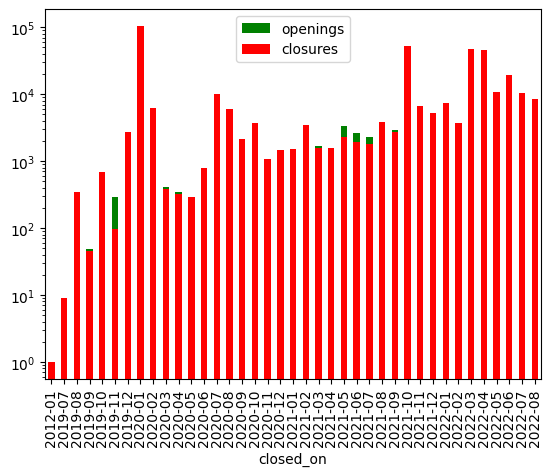

In [11]:
ax = df.opened_on.value_counts().sort_index().plot.bar(label="openings", color="green", logy=True)
df.closed_on.value_counts().sort_index().plot.bar(ax=ax, label="closures", color="red", logy=True)
plt.legend()

In [12]:
# See https://docs.safegraph.com/docs/places-rich-attributes#section-determining-when-poi-open-and-close
start_date = "2020-03"
end_date = "2023-03"
df["open_pre_pandemic"] = (df.opened_on.isna() | (df.opened_on < start_date)) & (df.closed_on.isna() | (df.closed_on > start_date))
df["open_post_pandemic"] = (df.opened_on.isna() | (df.opened_on < end_date)) & (df.closed_on.isna() | (df.closed_on > end_date))
pre_retail = sum(df.open_pre_pandemic)
post_retail = sum(df.open_post_pandemic)
print(f"Globally, there were {pre_retail} retail locations open prior to {start_date}, and {post_retail} retail locations open after {end_date}.")
delta = post_retail - pre_retail
print(f"This is an change of {delta}, which is {delta/pre_retail:.2%}")

Globally, there were 5062558 retail locations open prior to 2020-03, and 4874817 retail locations open after 2023-03.
This is an change of -187741, which is -3.71%


In [13]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna() & df.open_pre_pandemic & ~df.open_post_pandemic, ["opened_on", "closed_on", "open_pre_pandemic", "open_post_pandemic"]]

,opened_on,closed_on,open_pre_pandemic,open_post_pandemic
19669,2020-01,2020-10,True,False
28664,2019-08,2022-06,True,False
92683,2019-10,2022-01,True,False
118871,2020-02,2021-01,True,False
223251,2020-01,2022-06,True,False
...,...,...,...,...
404193,2020-01,2022-01,True,False
422334,2020-01,2021-04,True,False
424056,2020-01,2020-10,True,False
512440,2020-01,2020-10,True,False


In [84]:
def calculate_shannon(group):
    open_pre_pandemic = sum(group.open_pre_pandemic)
    open_post_pandemic = sum(group.open_post_pandemic)
    delta = open_post_pandemic - open_pre_pandemic
    if open_pre_pandemic:
        percentage_change = delta / open_pre_pandemic * 100
    else:
        percentage_change = pd.NA
    return pd.Series({
        "n_open_pre_pandemic": open_pre_pandemic,
        "n_open_post_pandemic": open_post_pandemic,
        "delta": delta,
        "percentage_change": percentage_change,
        "diversity_pre_pandemic_top_category": shannon(group.top_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_top_category": shannon(group.top_category[group.open_post_pandemic].value_counts().values),
        "diversity_pre_pandemic_sub_category": shannon(group.sub_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_sub_category": shannon(group.sub_category[group.open_post_pandemic].value_counts().values),
    })
by_country = df.groupby("iso_country_code").apply(calculate_shannon)
by_country.sort_values(by="n_open_pre_pandemic", ascending=False)

,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
iso_country_code,,,,,,,,
US,1897297.0,1722402.0,-174895.0,-9.218114,4.318812,4.301715,5.227871,5.214170
PL,530965.0,532154.0,1189.0,0.223932,3.048876,3.046939,2.948896,2.955378
GB,395134.0,394400.0,-734.0,-0.185760,4.298028,4.300361,4.359570,4.317274
DE,389323.0,389700.0,377.0,0.096835,4.098085,4.096422,4.662616,4.660705
FR,231577.0,232246.0,669.0,0.288889,3.889402,3.889237,4.543267,4.545652
ES,206296.0,206512.0,216.0,0.104704,3.795001,3.795643,4.282023,4.281297
IT,206296.0,206096.0,-200.0,-0.096948,3.521096,3.520904,4.153155,4.155615
CA,188896.0,169214.0,-19682.0,-10.419490,4.222909,4.201007,5.176194,5.147642
TR,137466.0,137587.0,121.0,0.088022,3.640463,3.640843,4.029752,4.034513


In [86]:
by_region = df.groupby(["region", "iso_country_code"]).apply(calculate_shannon).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_region.head(50)

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
743,CA,US,254126.0,224664.0,-29462.0,-11.593462,4.268582,4.254679,5.189382,5.179463
3865,TX,US,157476.0,145310.0,-12166.0,-7.725622,4.293003,4.271576,5.170809,5.153683
1283,FL,US,131898.0,119529.0,-12369.0,-9.377701,4.332395,4.321472,5.252184,5.247872
2669,NY,US,121823.0,107225.0,-14598.0,-11.982959,4.265522,4.266101,5.154585,5.156596
2469,Masovian,PL,84725.0,84899.0,174.0,0.20537,3.281246,3.279365,3.351414,3.357569
2797,Nordrhein-Westfalen,DE,77542.0,77546.0,4.0,0.005158,4.098912,4.097969,4.680375,4.680686
2886,ON,CA,74887.0,66741.0,-8146.0,-10.877722,4.231140,4.215854,5.192377,5.170326
2965,PA,US,70214.0,63942.0,-6272.0,-8.932691,4.352869,4.336068,5.221199,5.209298
548,Bayern,DE,66905.0,66978.0,73.0,0.10911,4.078714,4.077301,4.609387,4.607237
1664,IL,US,64946.0,58039.0,-6907.0,-10.634989,4.317773,4.308369,5.214459,5.208665


In [94]:
vc = df.city.value_counts()
cities = vc.index[vc > 100]
cities

Index(['Istanbul', 'London', 'Warsaw', 'New York', 'Los Angeles', 'Houston',
       'Paris', 'Madrid', 'Berlin', 'Kraków',
       ...
       'Barnard Castle', 'Sarnen', 'Cheraw', 'Oradea', 'Ensenada',
       'Carrazeda De Ansiães', 'Cáceres', 'Stony Plain', 'Burr Ridge',
       'Kronberg'],
      dtype='object', name='city', length=8112)

In [95]:
by_city = df[df.city.isin(cities)].groupby(["city", "iso_country_code"]).progress_apply(calculate_shannon).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_city.head(50)

  0%|          | 0/10799 [00:00<?, ?it/s]

,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
4315,Istanbul,TR,41777.0,41804.0,27.0,0.064629,3.567174,3.567224,4.118946,4.122083
5300,London,GB,35378.0,35200.0,-178.0,-0.503138,4.163011,4.166730,4.214652,4.185596
10009,Warsaw,PL,30242.0,30247.0,5.0,0.016533,3.489503,3.489307,3.553372,3.555186
6425,New York,US,23331.0,19247.0,-4084.0,-17.504608,3.946700,3.979387,4.849360,4.853486
5327,Los Angeles,US,22891.0,19371.0,-3520.0,-15.377222,3.955140,3.978522,4.839725,4.837808
4144,Houston,US,19373.0,17582.0,-1791.0,-9.244825,4.246745,4.237082,5.061475,5.060992
5472,Madrid,ES,18022.0,18024.0,2.0,0.011098,3.771698,3.772068,4.377763,4.376891
7024,Paris,FR,17779.0,17804.0,25.0,0.140615,3.630296,3.626230,4.465207,4.471507
881,Berlin,DE,17428.0,17472.0,44.0,0.252467,4.153786,4.152623,4.892177,4.890065
4720,Kraków,PL,14862.0,14901.0,39.0,0.262414,3.203964,3.202401,3.289936,3.295996


In [96]:
by_region[by_region.iso_country_code == "NZ"]

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
407,Auckland,NZ,874.0,892.0,18.0,2.059497,3.016317,3.017007,3.716539,3.723719
801,Canterbury,NZ,422.0,427.0,5.0,1.184834,2.606624,2.634798,3.331148,3.354536
4253,Waikato,NZ,348.0,357.0,9.0,2.586207,2.377651,2.422163,3.053396,3.087857
4263,Wellington,NZ,273.0,275.0,2.0,0.732601,3.080871,3.086949,3.654550,3.662889
2949,Otago,NZ,204.0,211.0,7.0,3.431373,2.531196,2.588785,3.165486,3.208161
2414,Manawatu-Wanganui,NZ,171.0,174.0,3.0,1.754386,2.415837,2.446251,3.018442,3.049170
541,Bay of Plenty,NZ,160.0,161.0,1.0,0.625,2.557461,2.561963,3.136564,3.139958
2844,Northland,NZ,144.0,147.0,3.0,2.083333,1.879095,1.950150,2.586386,2.643007
1583,Hawke's Bay,NZ,102.0,103.0,1.0,0.980392,2.642822,2.696019,3.153254,3.201496
3899,Taranaki,NZ,82.0,79.0,-3.0,-3.658537,2.515798,2.541874,3.006958,3.041503
